1. Разработайте скрипт Python, который создает визуализацию данных фондового рынка, используя данные из общедоступного API.

Используем:
<a href="https://www.alphavantage.co/documentation/">Alpha Vantage</a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [25]:
key = '83QZPGGEQ41DVSTV'

intevals = ['1min', '5min', '15min', '30min', '60min']

companies = {
    "Apple": "AAPL",
    "Amazon": "AMZN",
    "Microsoft": "MSFT",
    "Facebook": "FB",
    "Google": "GOOGL",
    "Tesla": "TSLA",
    "Netflix": "NFLX",
    "Alphabet": "GOOG",
    "Intel": "INTC",
    "Cisco": "CSCO",
    "Adobe": "ADBE",
    "Nvidia": "NVDA",
    "Oracle": "ORCL",
    "Salesforce": "CRM",
    "PayPal": "PYPL",
    "Visa": "V",
    "Mastercard": "MA",
    "IBM": "IBM",
    "AT&T": "T",
    "Verizon": "VZ",
    "Procter & Gamble": "PG",
    "Pfizer": "PFE",
    "Johnson & Johnson": "JNJ",
    "Walmart": "WMT",
    "Coca-Cola": "KO"
} # Список получен с помощью ChatGPT

In [32]:
def  draw_plot():
    print(*list(companies.keys()), sep=';')

    name = input("Выберете название компании\t")
    
    
    try:
        symbol = companies[name]
    except KeyError:
        print('Неправильное название компании!')
        return None
    
    
    print('---')
    
    print(*intevals, sep=';')
    interval = input('Введите интервал\t')

    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&"\
    f"symbol={symbol}&interval={interval}&slice=year1month1&adjusted=false&apikey={key}"

    try:
        df =  pd.read_csv(url)
    except requests.exceptions.InvalidURL as err:
        print('Неправильный ввод')
        return None

    y = df.close.values
    x = df.time.values
    
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f"График цены акции: {name}")
    ax.plot(x, y, linewidth=2.5, label=f"График цены акции: {name}") 
    tickers = x[0::x.shape[0]//30]
    ax.set_xticks(range(0, len(x), x.shape[0]//30))
    ax.set_xticklabels(x[0::x.shape[0]//30])
    ax.grid()
    ax.legend()
    ax.set_ylabel("Price, $")
    ax.set_xlabel("Date")
    plt.xticks(rotation=60);

Apple;Amazon;Microsoft;Facebook;Google;Tesla;Netflix;Alphabet;Intel;Cisco;Adobe;Nvidia;Oracle;Salesforce;PayPal;Visa;Mastercard;IBM;AT&T;Verizon;Procter & Gamble;Pfizer;Johnson & Johnson;Walmart;Coca-Cola
Выберете название компании	AT&T
---
1min;5min;15min;30min;60min
Введите интервал	30min


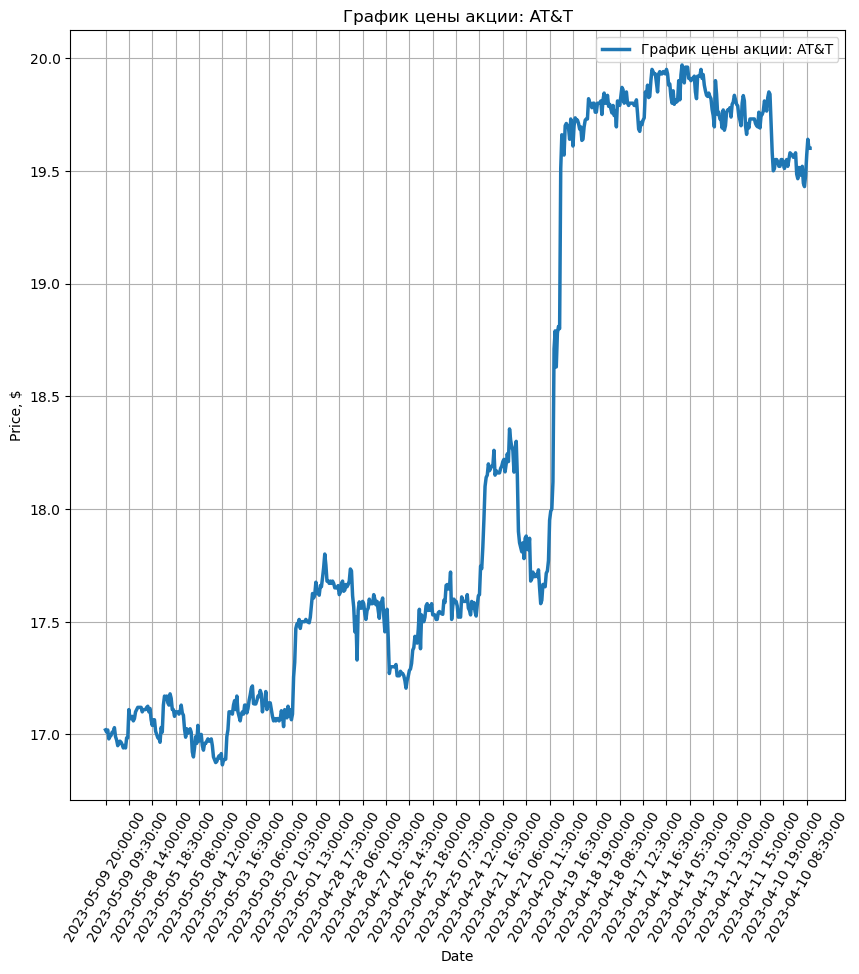

In [33]:
draw_plot()